<a href="https://colab.research.google.com/github/koysean/plotting_workshop/blob/main/Plotting_workshop_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

First import data from github

In [ ]:
!wget https://raw.githubusercontent.com/koysean/plotting_workshop/main/c_e_v.csv
!wget https://raw.githubusercontent.com/koysean/plotting_workshop/main/si_e_v.csv
!wget https://raw.githubusercontent.com/koysean/plotting_workshop/main/ge_e_v.csv

Then parse the CSV files into numpy arrays. With this code the data will be arranged into 2 x *n* arrays, with the first row containing volumes (Å<sup>3</sup>) and the second row containing energy (eV).

*Note: raw energy values should not be directly compared as they do not share a well-defined reference point*

In [ ]:
c_e_v = [[], []]
si_e_v = [[], []]
ge_e_v = [[], []]

with open('c_e_v.csv', 'r') as file:
  for line in file.readlines():
    split_line = line.split(',')
    c_e_v[0].append(float(split_line[0]))
    c_e_v[1].append(float(split_line[1]))
  c_e_v = np.asarray(c_e_v)

with open('si_e_v.csv', 'r') as file:
  for line in file.readlines():
    split_line = line.split(',')
    si_e_v[0].append(float(split_line[0]))
    si_e_v[1].append(float(split_line[1]))
  si_e_v = np.asarray(si_e_v)

with open('ge_e_v.csv', 'r') as file:
  for line in file.readlines():
    split_line = line.split(',')
    ge_e_v[0].append(float(split_line[0]))
    ge_e_v[1].append(float(split_line[1]))
  
  ge_e_v = np.asarray(ge_e_v)

We can find the equilibrium volume and energy by looking at where the energy is at a minimum.

In [ ]:
min_volumes = {
    'c':  c_e_v[0][np.argmin(c_e_v[1])],
    'si':  si_e_v[0][np.argmin(si_e_v[1])],
    'ge':  ge_e_v[0][np.argmin(ge_e_v[1])]
}

min_energies = {
    'c':  np.min(c_e_v[1]),
    'si':  np.min(si_e_v[1]),
    'ge':  np.min(ge_e_v[1])
}

print('(Roughly) Equilibrium values of (V, E):')
print('C:\t{:.3f}, {:.3f}'.format(min_volumes['c'], min_energies['c']))
print('Si:\t{:.3f}, {:.3f}'.format(min_volumes['si'], min_energies['si']))
print('Ge:\t{:.3f}, {:.3f}'.format(min_volumes['ge'], min_energies['ge']))

(Roughly) Equilibrium values of (V, E):
C:	11.345, -18.658
Si:	41.569, -10.856
Ge:	48.035, -9.105


With this data, we can plot the energy-volume curve!

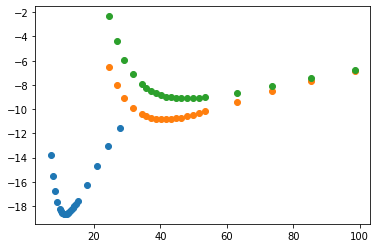

In [ ]:
fig, ax = plt.subplots()

ax.scatter(c_e_v[0], c_e_v[1])
ax.scatter(si_e_v[0], si_e_v[1])
ax.scatter(ge_e_v[0], ge_e_v[1])

This raw data only consists of discrete (V, E) pairs. We can extract physical parameters from this data by *fitting* to an equation of state. In this example, we fit to the Birch–Murnaghan equation of state:

$E(V) = E_0 + \dfrac{9V_0B_0}{16} \left\{ \left[   \left(  \dfrac{V_0}{V}\right)^{\frac{2}{3}} - 1 \right]^3 B_0'  + \left[  \left(  \dfrac{V_0}{V}\right)^{\frac{2}{3}}-1 \right]^2 \left[ 6 - 4 \left(  \dfrac{V_0}{V}\right)^{\frac{2}{3}}    \right]    \right\}$

In [ ]:
def bm_eos(v, v0, b0, bp0, e0):
  ''' Birch-Murnaghan EOS. 
  Gives the energy relative to the equilibrium energy, i.e. E(V) - E0. '''

  #v0 = min_volumes['c']

  gamma = (v0/v)**(2/3)

  return e0 + 9/16 * v0 * b0 * (
      (gamma - 1)**3 * bp0
      + (gamma - 1)**2 * (6 - 4*gamma)
  )

In [ ]:
fit, conv = curve_fit(bm_eos, c_e_v[0], c_e_v[1], p0 = [min_volumes['c'], 2, 2, -10])
fit

array([ 11.31433243,   2.69028099,   3.91315318, -18.64456242])

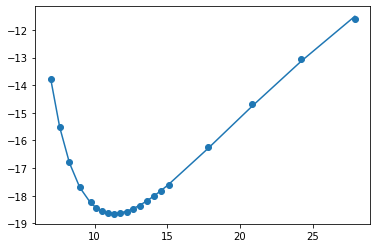

In [ ]:
fig, ax = plt.subplots()

ax.scatter(c_e_v[0], c_e_v[1])
ax.plot(c_e_v[0], bm_eos(c_e_v[0], *fit))

In [ ]:
c_e_v_scaled = np.array(
    [c_e_v[0]/min_volumes['c'], -c_e_v[1]/min_energies['c']]
)

si_e_v_scaled = np.array(
    [si_e_v[0]/min_volumes['si'], -si_e_v[1]/min_energies['si']]
)

ge_e_v_scaled = np.array(
    [ge_e_v[0]/min_volumes['ge'], -ge_e_v[1]/min_energies['ge']]
)

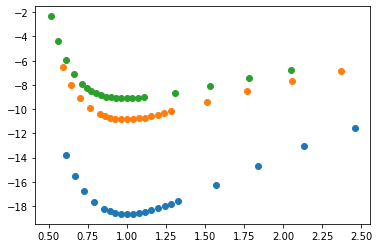

In [ ]:
fig, ax = plt.subplots()

ax.scatter(c_e_v_scaled[0], c_e_v[1])
ax.scatter(si_e_v_scaled[0], si_e_v[1])
ax.scatter(ge_e_v_scaled[0], ge_e_v[1])

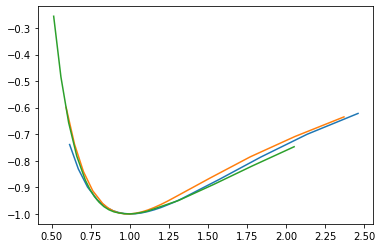

In [ ]:
fig, ax = plt.subplots()

ax.plot(c_e_v_scaled[0], c_e_v_scaled[1])
ax.plot(si_e_v_scaled[0], si_e_v_scaled[1])
ax.plot(ge_e_v_scaled[0], ge_e_v_scaled[1])